In [2]:
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
from datetime import datetime 
import datetime
import collections
from collections import Counter
import glob
import time
import os
from joblib import Parallel, delayed
from multiprocessing import Pool
import seaborn as sns
%matplotlib inline

In [2]:
# # ディレクトリ変更
# os.chdir('/Users/daiki.m/Desktop/marunasu/20210612')

# df = pd.DataFrame(columns = [])

# for i in glob.glob("*rsdata*"):
#     tmp = pd.read_csv(i, header=None)
#     df = pd.concat([df, tmp])
# df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,2021-06-12 14:14:08.024318,20394,880.527466,267.1875,4267.0,919.912109,300.9375,3924.0,897.406616,300.9375,...,-1.0,886.153870,261.5625,4048.0,-1.000000,-1.0000,-1.0,903.033020,255.9375,3909.0
1,2021-06-12 14:14:08.024318,20390,559.824219,239.0625,4655.0,604.835205,272.8125,3738.0,627.340698,278.4375,...,-1.0,571.076965,227.8125,4232.0,616.087952,233.4375,4080.0,582.329712,233.4375,3969.0
2,2021-06-12 14:14:08.024318,20399,-1.000000,-1.0000,-1.0,1279.000000,289.6875,4613.0,-1.000000,-1.0000,...,-1.0,-1.000000,-1.0000,-1.0,-1.000000,-1.0000,-1.0,-1.000000,-1.0000,-1.0
3,2021-06-12 14:14:08.154687,20394,869.274719,261.5625,4080.0,903.033020,300.9375,3894.0,886.153870,295.3125,...,-1.0,874.901123,255.9375,4032.0,-1.000000,-1.0000,-1.0,897.406616,255.9375,3879.0
4,2021-06-12 14:14:08.154687,20399,1251.868164,250.3125,8193.0,1279.000000,295.3125,4492.0,1251.868164,289.6875,...,0.0,1279.000000,244.6875,4377.0,-1.000000,-1.0000,-1.0,-1.000000,-1.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2021-06-12 07:42:12.211693,2699,-1.000000,-1.0000,-1.0,115.340660,559.6875,975.0,256.000000,542.8125,...,-1.0,-1.000000,-1.0000,-1.0,171.604401,407.8125,995.0,2.813187,424.6875,940.0
9997,2021-06-12 07:42:12.293523,2699,-1.000000,-1.0000,-1.0,115.340660,565.3125,973.0,256.000000,548.4375,...,-1.0,-1.000000,-1.0000,-1.0,171.604401,407.8125,998.0,2.813187,430.3125,0.0
9998,2021-06-12 07:42:12.375851,2699,-1.000000,-1.0000,-1.0,109.714287,565.3125,966.0,256.000000,548.4375,...,-1.0,-1.000000,-1.0000,-1.0,177.230774,407.8125,996.0,2.813187,424.6875,0.0
9999,2021-06-12 07:42:12.459142,2699,-1.000000,-1.0000,-1.0,115.340660,570.9375,969.0,256.000000,548.4375,...,-1.0,-1.000000,-1.0000,-1.0,177.230774,402.1875,994.0,2.813187,430.3125,0.0


In [4]:
#こっち使う
allfiles = glob.glob('20210725/*.csv')
list = []
for file in allfiles:
    list.append(pd.read_csv(file,header=None))
df = pd.concat(list, sort=False)
df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,2021-07-25 04:59:12.930362,14,593.582458,120.9375,5073.0,593.582458,137.8125,5023.0,582.329712,143.4375,...,-1.0,-1.000000,-1.0000,-1.0,-1.000000,-1.0000,-1.0,593.582458,120.9375,5073.0
1,2021-07-25 04:59:50.264861,15,1279.000000,194.0625,5696.0,1279.000000,227.8125,5728.0,-1.000000,-1.0000,...,5665.0,1279.000000,188.4375,5665.0,-1.000000,-1.0000,-1.0,-1.000000,-1.0000,-1.0
2,2021-07-25 04:59:50.347525,15,1279.000000,199.6875,5453.0,1279.000000,227.8125,5453.0,1251.868164,227.8125,...,5424.0,1279.000000,188.4375,5366.0,1279.000000,194.0625,5424.0,-1.000000,-1.0000,-1.0
3,2021-07-25 04:59:50.430180,16,-1.000000,-1.0000,-1.0,1257.494507,222.1875,5511.0,1234.989014,222.1875,...,-1.0,-1.000000,-1.0000,-1.0,1251.868164,194.0625,5572.0,1279.000000,194.0625,5395.0
4,2021-07-25 04:59:50.430180,15,1279.000000,199.6875,5366.0,1279.000000,222.1875,5482.0,1234.989014,222.1875,...,5395.0,1279.000000,194.0625,5395.0,1251.868164,194.0625,5572.0,-1.000000,-1.0000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2021-07-25 07:07:29.697223,1441,1251.868164,120.9375,10512.0,1251.868164,126.5625,10621.0,1240.615356,132.1875,...,-1.0,1251.868164,115.3125,10095.0,1240.615356,115.3125,10095.0,-1.000000,-1.0000,-1.0
9997,2021-07-25 07:07:29.779843,1438,1128.087891,165.9375,5229.0,1083.076904,188.4375,5366.0,1094.329712,194.0625,...,5541.0,-1.000000,-1.0000,-1.0,1111.208862,165.9375,5696.0,-1.000000,-1.0000,-1.0
9998,2021-07-25 07:07:29.779843,1441,1251.868164,120.9375,10512.0,1251.868164,126.5625,10512.0,1246.241821,132.1875,...,-1.0,1251.868164,115.3125,10196.0,-1.000000,-1.0000,-1.0,-1.000000,-1.0000,-1.0
9999,2021-07-25 07:07:29.861776,1438,1128.087891,165.9375,5283.0,1088.703369,188.4375,5424.0,1094.329712,194.0625,...,5602.0,-1.000000,-1.0000,-1.0,1111.208862,160.3125,5572.0,-1.000000,-1.0000,-1.0


In [5]:
df_timeid = pd.DataFrame()
df_timeid = df.iloc[:, [0,1]]
df_timeid.columns = ['Time', 'Id']
df_timeid["Time"] = pd.to_datetime(df_timeid["Time"],format='%Y-%m-%d %H:%M:%S')
df_timeid=df_timeid.query("Time >= '2021-07-25 09:00:00' and Time <='2021-07-25 20:00:00'")
df_timeid

<ipython-input-5-00789aef261f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_timeid["Time"] = pd.to_datetime(df_timeid["Time"],format='%Y-%m-%d %H:%M:%S')


,Time,Id
0,2021-07-25 13:07:34.846364,14277
1,2021-07-25 13:07:34.846364,14243
2,2021-07-25 13:07:34.846364,14307
3,2021-07-25 13:07:34.986833,14243
4,2021-07-25 13:07:34.986833,14277
...,...,...
9997,2021-07-25 19:20:35.460286,41894
9998,2021-07-25 19:20:35.460286,41868
9999,2021-07-25 19:20:35.542219,41894
10000,2021-07-25 19:20:35.542219,41868


In [6]:
#IDごとにまとめる
df_timeid = df_timeid.sort_values(['Id', 'Time'])
all_dict = {}

for id in sorted(set(df_timeid['Id'])):
    #print('id', id)
    #print(df_timeid[df_timeid['Id'] == id])
    all_dict[id] = df_timeid[df_timeid['Id'] == id]

In [7]:
#time_dict内に滞在時間を格納(3秒以下は削除)
time_dict={}
for id in all_dict:
        start = all_dict[id]["Time"].iloc[0].replace(microsecond = 0)
        end = all_dict[id]["Time"].iloc[-1].replace(microsecond = 0)
        #start = datetime.datetime.strptime(all_dict[id]["Time"].iloc[0].split(".")[0], "%Y-%m-%d %H:%M:%S")
        #end = datetime.datetime.strptime(all_dict[id]["Time"].iloc[-1].split(".")[0], "%Y-%m-%d %H:%M:%S")
        #print(start,end,(end-start).seconds)
        T = (end - start).seconds
        if T < 3:
            id = 0
        else:
            time_dict[id] = T
#print(time_dict)
values = time_dict.values()
total = sum(values)
ave_time = total/len(time_dict)

print('1日の平均ブース滞在時間　：', ave_time)
print('1日の訪問者数　：', len(time_dict))

1日の平均ブース滞在時間　： 10.688310667400362
1日の訪問者数　： 12721


In [22]:
#分毎の訪問者数
start_list = []
start_taime = []
for id in time_dict:
        start = all_dict[id]["Time"].iloc[0].replace(microsecond = 0)
        #start = datetime.datetime.strptime(all_dict[id]["Time"].iloc[0].split(".")[0], "%Y-%m-%d %H:%M:%S")
        start_list.append(start.strftime("%Y/%m/%d %H:%M"))
c = collections.Counter(start_list)
#print(c)
df_visitor = pd.DataFrame.from_dict(c, orient='index').reset_index()
df_visitor.columns = ['Time', 'Visitor']
df_visitor

,Time,Visitor
0,2021/07/25 09:00,15
1,2021/07/25 09:01,5
2,2021/07/25 09:02,3
3,2021/07/25 09:03,3
4,2021/07/25 09:05,1
...,...,...
653,2021/07/25 19:55,7
654,2021/07/25 19:56,20
655,2021/07/25 19:57,19
656,2021/07/25 19:58,16


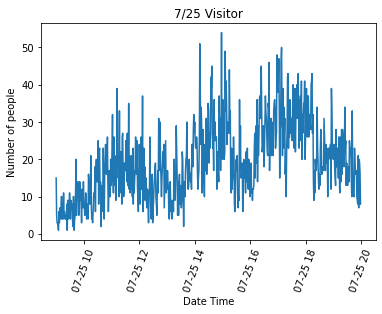

In [9]:
import matplotlib.dates as mdates
df_visitor['Time'] = pd.to_datetime(df_visitor['Time'])

df = df_visitor.set_index('Time')
plt.plot(df.index, df_visitor['Visitor'])
plt.title('7/25 Visitor')
plt.xlabel('Date Time')
plt.ylabel('Number of people')
plt.xticks(rotation=70)

plt.show()

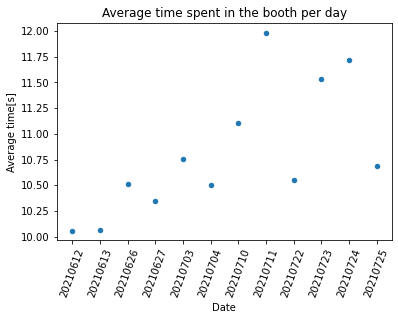

In [43]:
a_values = ['20210612', '20210613', '20210626', '20210627', '20210703', '20210704', '20210710', '20210711', '20210722', '20210723', '20210724', '20210725']
b_values = [10.06, 10.07, 10.51, 10.35, 10.76, 10.50, 11.1, 11.98, 10.55, 11.53, 11.72, 10.69]
c_values = [10446, 10853, 8517, 10553, 8586, 9363, 13127, 9411, 11371, 12444, 12643, 12721]
my_dict = {"Date": a_values, "Average time spent in the booth per day": b_values, "Number of visitors per day":c_values}


total_df = pd.DataFrame.from_dict(my_dict)

df_total = total_df.set_index('Date')
df_total

total_df.plot.scatter(x='Date', y='Average time spent in the booth per day')

plt.title('Average time spent in the booth per day')
plt.xlabel('Date')
plt.ylabel('Average time[s]')
plt.xticks(rotation=70)

plt.show()

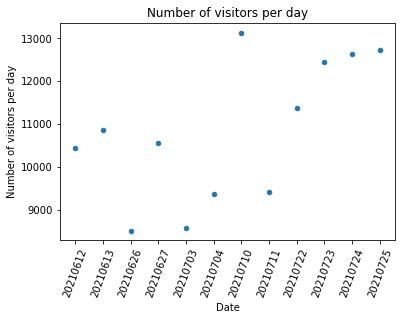

In [42]:
#plt.plot(df_total.index, df_total['Average time spent in the booth per day'])
total_df.plot.scatter(x='Date', y='Number of visitors per day')

plt.title('Number of visitors per day')
plt.xlabel('Date')
plt.ylabel('Number of visitors per day')
plt.xticks(rotation=70)

plt.show()